# Sphere Sampling

In [4]:
%matplotlib widget
import numpy as np
import math
import matplotlib.pyplot as plt


## Sampler

In [5]:
def get_theta(x):
    return math.asin(2 * x - 1) # 0 <= x <= 1, - pi / 2 <= theta <= pi / 2

In [6]:
def sampler(r = 1):
    theta = get_theta(np.random.rand())
    phi = np.random.rand() * 2 * np.pi

    x = r * math.cos(theta) * math.sin(phi)
    y = r * math.cos(theta) * math.cos(phi)
    z = r * math.sin(theta)
    return [x, y, z]

In [7]:
x, y, z = sampler()
x ** 2 + y ** 2 + z ** 2

0.9999999999999999

## Visualization

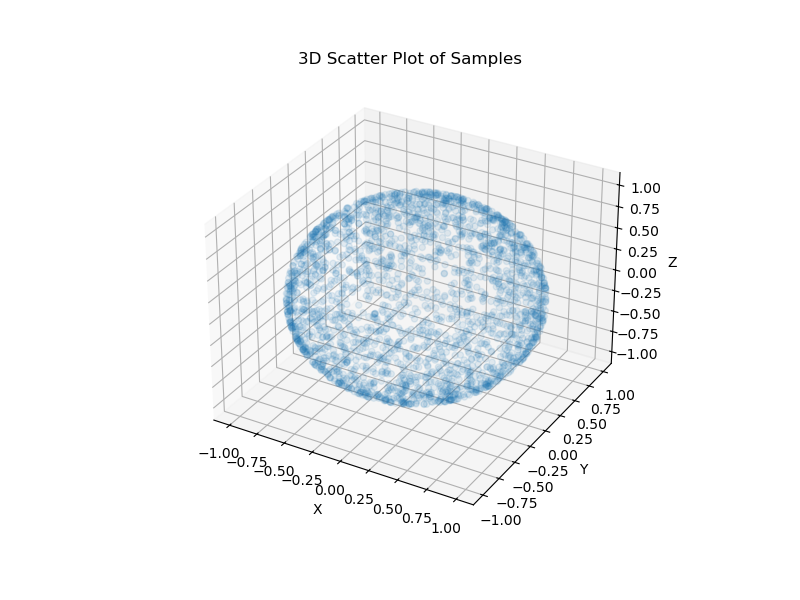

In [ ]:
samples = sampler()


# Sample 초기화
n = 5000
samples = np.array([sampler() for i in range(n)])

# 3D scatter plot 생성
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# samples의 각 좌표를 산점도로 표시합니다.
ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], marker='o', alpha=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Samples')

plt.show()



## Verification

In [ ]:
# Verify the distribution of sample
samples = np.array([sampler() for i in range(n)])